## Introduction

This data set is provided from https://archive.org/download/nycTaxiTripData2013/trip_data.7z and https://archive.org/download/nycTaxiTripData2013/trip_fare.7z. We are asked to be part of an analytics team and support NYC taxis to identify opportunities to improve their revenue or cut costs. Given the size of the data, we select a month of data (August) for our analysis.

### Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
 

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

from datetime import datetime



In [2]:
df_fare = pd.read_csv('./data/trip_fare/trip_fare_8.csv')

In [3]:
df_trip = pd.read_csv('./data/trip_data/trip_data_8.csv')

C:\Users\Nastaran\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('Total data_fare size is {}'.format(df_fare.shape))
print('Total data_trip size is {}'.format(df_trip.shape))


Total data_fare size is (12597109, 11)
Total data_trip size is (12597109, 14)


In [5]:
df_fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,3418135604CD3F357DD9577AF978C5C0,B25386A1F259C87449430593E904FDBC,VTS,2013-08-30 07:57:00,CSH,41.5,0.0,0.5,0.0,0.00,42.00
1,6D3B2A7682C30DCF64F3F12976EF93B6,A603A9D5FAA46E8FF2A97A143328D938,CMT,2013-08-30 23:26:23,CSH,31.0,0.5,0.5,0.0,5.33,37.33
2,6D49E494913752B75B2685E0019FF3D5,3F0BFE90A5D71741840B25600A89E225,CMT,2013-08-30 09:18:10,CSH,5.5,0.0,0.5,0.0,0.00,6.00
3,4C4A0AFC432A1A87E97ED8F18403FF6E,BA20A20E2CF85EF7B00162D711394C7E,CMT,2013-08-26 23:27:11,CSH,23.0,0.5,0.5,0.0,5.33,29.33
4,1258CA1DF5E2A9E9A9F7848408A7AAEB,8C14DCF69CAA2A9A0DFAFD99E00536A1,CMT,2013-08-29 10:57:56,CSH,14.0,0.0,0.5,0.0,0.00,14.50


In [6]:
df_trip.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,3418135604CD3F357DD9577AF978C5C0,B25386A1F259C87449430593E904FDBC,VTS,1,NaN,2013-08-30 07:57:00,2013-08-30 08:30:00,5,1980,14.58,-73.791359,40.645657,-73.922501,40.758766
1,6D3B2A7682C30DCF64F3F12976EF93B6,A603A9D5FAA46E8FF2A97A143328D938,CMT,1,N,2013-08-30 23:26:23,2013-08-30 23:46:01,2,1177,11.00,-73.862724,40.769062,-73.976845,40.764595
2,6D49E494913752B75B2685E0019FF3D5,3F0BFE90A5D71741840B25600A89E225,CMT,1,N,2013-08-30 09:18:10,2013-08-30 09:24:08,1,357,0.80,-73.991653,40.750324,-73.986420,40.742924
3,4C4A0AFC432A1A87E97ED8F18403FF6E,BA20A20E2CF85EF7B00162D711394C7E,CMT,1,N,2013-08-26 23:27:11,2013-08-26 23:42:49,4,938,7.70,-73.975372,40.756237,-73.867119,40.721886
4,1258CA1DF5E2A9E9A9F7848408A7AAEB,8C14DCF69CAA2A9A0DFAFD99E00536A1,CMT,1,N,2013-08-29 10:57:56,2013-08-29 11:19:06,2,1270,2.10,-73.991020,40.750912,-73.996727,40.767578


The medallion and hack_license columns look like simple ID columns.

We merge the two tables.

In [7]:
df = pd.merge(left=df_trip, left_index=True,
                  right=df_fare, right_index=True,
                  how='inner')

In [8]:
print('Total data size is {}'.format(df.shape))


Total data size is (12597109, 25)


In [9]:
df.dtypes


medallion_x             object
 hack_license_x         object
 vendor_id_x            object
 rate_code               int64
 store_and_fwd_flag     object
 pickup_datetime_x      object
 dropoff_datetime       object
 passenger_count         int64
 trip_time_in_secs       int64
 trip_distance         float64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
medallion_y             object
 hack_license_y         object
 vendor_id_y            object
 pickup_datetime_y      object
 payment_type           object
 fare_amount           float64
 surcharge             float64
 mta_tax               float64
 tip_amount            float64
 tolls_amount          float64
 total_amount          float64
dtype: object

We drop the columns below in which are duplicated after merging the tables.

In [10]:
df.drop(['medallion_y',' hack_license_y',' vendor_id_y', ' pickup_datetime_y'], axis=1, inplace=True)

Also, total_amount column is the sum of tip_amount, fare_amount, tolls_amount, mta_tax and surcharge columns. We do not need a feature in which has the information from the target value (fare_amount or tip_amount). So, we drop it.

In [11]:
# (df['fare_amount']+df['tip_amount']+df['tolls_amount']+df['mta_tax']+df['surcharge']).sum()

In [12]:
df.drop([' total_amount'], axis=1, inplace=True)

In [13]:
print('Total data size is {}'.format(df.shape))


Total data size is (12597109, 20)


Check column names and clean.

In [14]:
def clean_column_name(column_names):
    clean_column_names = []
    for c in column_names:
        c = c.lower().replace(' ', '')
        c = c.lower().replace('_x', '')

        clean_column_names.append(c)
        
    return clean_column_names

In [15]:
df.columns = clean_column_name(df.columns)

In [16]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount'],
      dtype='object')

Check type of columns.

In [17]:
df.dtypes


medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
dtype: object

The pickup_datetime and dropoff_datetime columns seem to be datetime columns which are in object format. We convert them to datetime.

In [18]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [19]:
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

### Distribution of values of categorical columns

A few columns are categorical data, like vendor_id, store_and_fwd_flag, payment_type. 

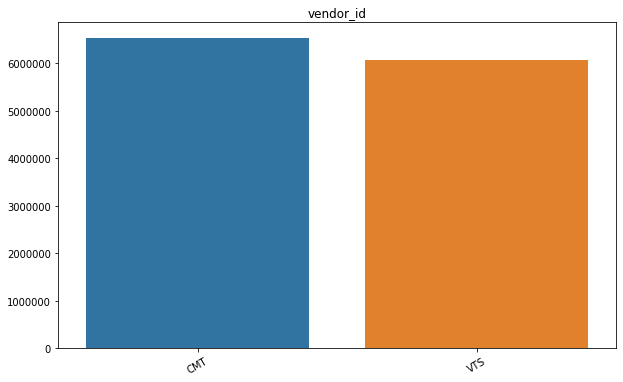

In [20]:
plotdata = df['vendor_id'].value_counts()
plt.figure(figsize = (10,6))
sns.barplot(x = plotdata.index, y=plotdata.values)
plt.title('vendor_id')
plt.xticks(rotation=30)
plt.show()

vendor_id takes on only two values in datasets, VTS and CMT (Hypothesis - This could represent data from two different taxi companies)

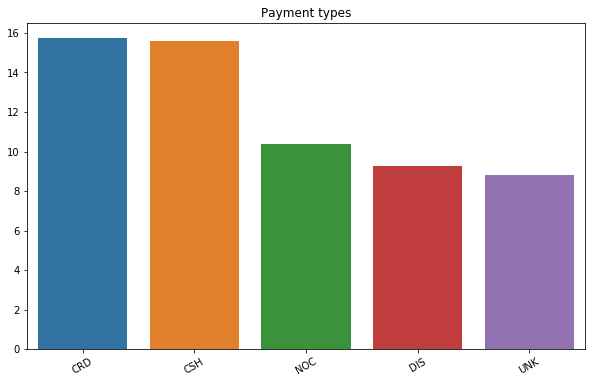

In [21]:
plotdata = df['payment_type'].value_counts()
plt.figure(figsize = (10,6))
sns.barplot(x = plotdata.index, y=np.log(plotdata.values))
plt.title('Payment types')
plt.xticks(rotation=30)
plt.show()

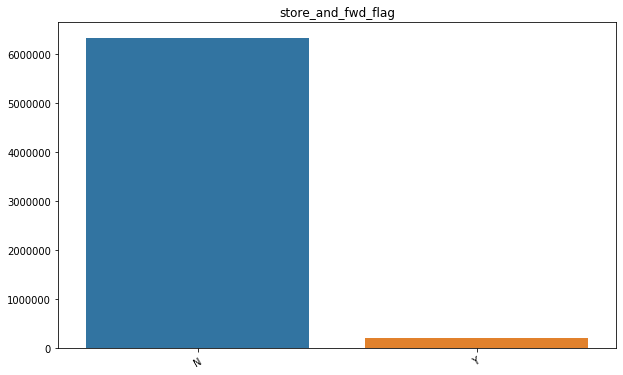

In [22]:
plotdata = df['store_and_fwd_flag'].value_counts()
plt.figure(figsize = (10,6))
sns.barplot(x = plotdata.index, y=plotdata.values)
plt.title('store_and_fwd_flag')
plt.xticks(rotation=30)
plt.show()

rate_code is an integer type which should consider as an object. 

In [23]:
df['rate_code'].value_counts()

1      12292294
2        238409
5         39291
3         20768
4          5695
0           423
6           175
8            20
210          15
7            13
9             3
239           1
200           1
16            1
Name: rate_code, dtype: int64

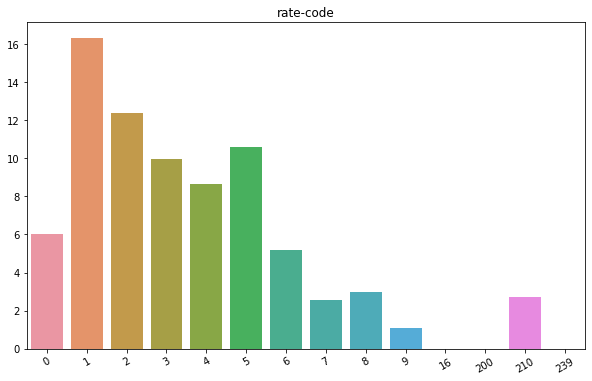

In [24]:
plotdata = df['rate_code'].value_counts()
plt.figure(figsize = (10,6))
sns.barplot(x = plotdata.index, y=np.log(plotdata.values))
plt.title('rate-code')
plt.xticks(rotation=30)
plt.show()

In [25]:
df['rate_code'] = df['rate_code'].astype(str)


In [26]:
df.dtypes


medallion                     object
hack_license                  object
vendor_id                     object
rate_code                     object
store_and_fwd_flag            object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
payment_type                  object
fare_amount                  float64
surcharge                    float64
mta_tax                      float64
tip_amount                   float64
tolls_amount                 float64
dtype: object

#### Removing missing values

Let's check for the missing values in each columns



In [27]:
df.isnull().any().sum()

3

There are three columns with null values. 

In [28]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()*100/len(df)).sort_values(ascending=False)

table_miss_val = pd.concat([count,percentage], axis=1, keys=['Count', 'Percentage (%)'])

table_miss_val.head(5)


,Count,Percentage (%)
store_and_fwd_flag,6066630,48.158907
dropoff_latitude,45,0.000357
dropoff_longitude,45,0.000357
tolls_amount,0,0.000000
trip_time_in_secs,0,0.000000


We drop the store_and_fwd_flag column which has almost 50% null values.

In [29]:
df=df.drop(['store_and_fwd_flag'], axis=1)

Then, we delete all the rows which have null values

In [30]:
print('The previous data size was {}'.format(df.shape))
df = df.dropna(how = 'any', axis = 'rows')
print('The current data size is {}'.format(df.shape))


The previous data size was (12597109, 19)
The current data size is (12597064, 19)


Check for any duplication.

In [31]:
print('The number of the duplicated rows are {}'.format((df[df.duplicated()]).shape[0]))

The number of the duplicated rows are 51


In [32]:
df = df.drop_duplicates()

In [33]:
print('The current data size is {}'.format(df.shape))

The current data size is (12597013, 19)


Check statistics of the features.

In [34]:
df.describe()

,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount
count,1.259701e+07,1.259701e+07,1.259701e+07,1.259701e+07,1.259701e+07,1.259701e+07,1.259701e+07,1.259701e+07,1.259701e+07,1.259701e+07,1.259701e+07,1.259701e+07
mean,1.701691e+00,1.557161e+03,7.743563e+01,-7.313471e+01,4.028571e+01,-7.308241e+01,4.025759e+01,1.256981e+01,3.310819e-01,4.977591e-01,1.359669e+00,2.752593e-01
std,1.369036e+00,5.860071e+04,2.461924e+04,7.879061e+00,4.679925e+00,8.133708e+00,4.942209e+00,5.453665e+01,8.009745e-01,7.391196e-02,2.351750e+00,1.499760e+00
min,0.000000e+00,-6.480000e+03,0.000000e+00,-1.958327e+03,-3.347937e+03,-2.216325e+03,-3.114339e+03,-1.430000e+03,-1.950000e+01,-5.000000e-01,-9.682000e+01,-2.225000e+01
25%,1.000000e+00,3.670000e+02,1.010000e+00,-7.399273e+01,4.073426e+01,-7.399186e+01,4.073335e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00
50%,1.000000e+00,6.010000e+02,1.900000e+00,-7.398235e+01,4.075160e+01,-7.398099e+01,4.075212e+01,9.500000e+00,5.000000e-01,5.000000e-01,1.000000e+00,0.000000e+00
75%,2.000000e+00,9.600000e+02,3.300000e+00,-7.396840e+01,4.076529e+01,-7.396511e+01,4.076591e+01,1.400000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00
max,2.080000e+02,4.294966e+06,1.533180e+07,5.142525e+01,4.739583e+02,9.341115e+01,1.344402e+03,1.589958e+05,8.545000e+02,8.005000e+01,8.881900e+02,9.600900e+02


The minimal fare_amount is negative. As this does not seem to be realistic and we drop them from the dataset.

In [35]:
print('Previous size: %d' % len(df))
df = df[df['fare_amount']>=0]
print('Current size: %d' % len(df))

Previous size: 12597013
Current size: 12593385


The minimal trip_time_in_secs, tip_amount, mta_tax, tolls_amount and surcharge are also negative. As this does not seem to be realistic, we will drop them from the dataset.



In [36]:
print('Previous size: %d' % len(df))

# df = df[(df['trip_time_in_secs']>=0)|(df['tip_amount']>=0)|(df['surcharge']>=0)|(df['mta_tax']>=0)|(df['tolls_amount']>=0)]
df = df[df['trip_time_in_secs']>=0]
df = df[df['tip_amount']>=0]
df = df[df['surcharge']>=0]
df = df[df['mta_tax']>=0]
df = df[df['tolls_amount']>=0]
# df = df[df['total_amount']>=0]

print('Current size: %d' % len(df))

Previous size: 12593385
Current size: 12593376


###  Target Variables

#### 1. fare_amount

In [37]:
df['fare_amount'].describe()

count    1.259338e+07
mean     1.257657e+01
std      5.453741e+01
min      0.000000e+00
25%      6.500000e+00
50%      9.500000e+00
75%      1.400000e+01
max      1.589958e+05
Name: fare_amount, dtype: float64

In [38]:
df['fare_amount'].sort_values(ascending=False)

10481601    158995.81
9139450      82162.30
49452        61550.86
6324054       9000.60
10161497      7025.50
              ...    
10508095         0.00
7316213          0.00
4344721          0.00
6020914          0.00
7630025          0.00
Name: fare_amount, Length: 12593376, dtype: float64

The target variable, fare_amount seems to have extreme values.

plot histogram of fare


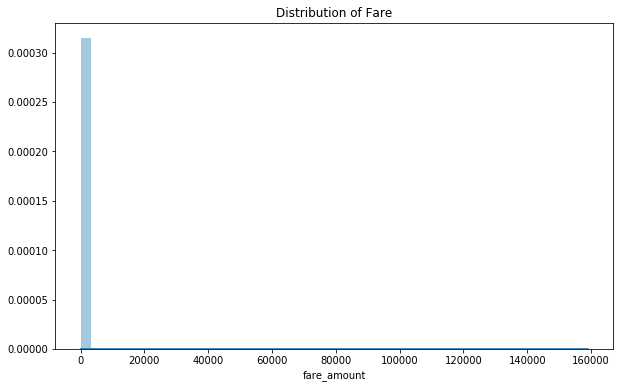

In [39]:
plt.figure(figsize = (10, 6))
sns.distplot(df['fare_amount'])
plt.title('Distribution of Fare')
plt.show()

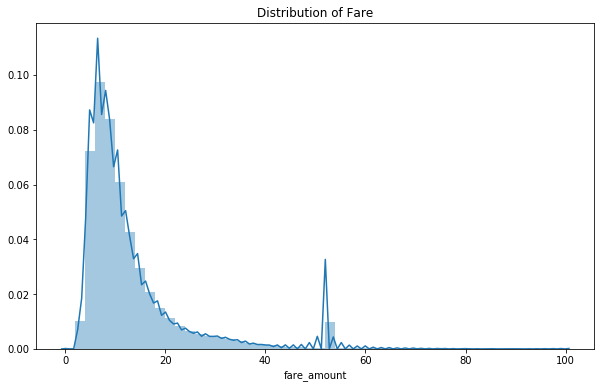

In [40]:
plt.figure(figsize = (10, 6))
sns.distplot(df[df['fare_amount']<100]['fare_amount'])
plt.title('Distribution of Fare')
plt.show()



In [41]:
print(f"There are {len(df[df['fare_amount'] == 0])} $0 fares.")
print(f"There are {len(df[df['fare_amount'] > 100])} fares greater than $100.")

There are 3630 $0 fares.
There are 5710 fares greater than $100.


We assume fares with zero amounts are related to passengers who cancelled the ride. Based on https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page#:~:text=%242.50%20initial%20charge.,Dutchess%2C%20Orange%20or%20Putnam%20Counties. minimum taxi fare is 2.5. So, we  drop the fare amount less than 2.5 and bigger than $100. We justify this based on the limited number of fares outside this bounds, but it might be possible that including these values helps the model!

In [42]:
df = df[df['fare_amount'].between(left = 2.5, right = 100)]


In [43]:
print('Total data size is {}'.format(df.shape))


Total data size is (12581815, 19)


#### 2.Tips

In [44]:
df['tip_amount'].describe()

count    1.258182e+07
mean     1.354930e+00
std      2.290825e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      8.881900e+02
Name: tip_amount, dtype: float64

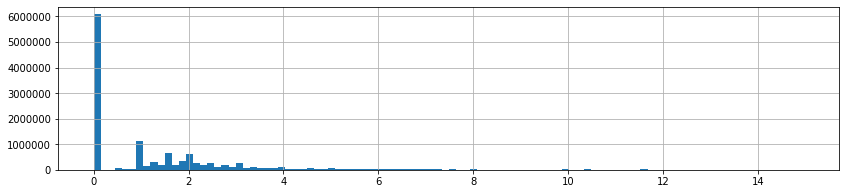

In [45]:
df[df['tip_amount']<15]['tip_amount'].hist(bins=100, figsize=(14,3))

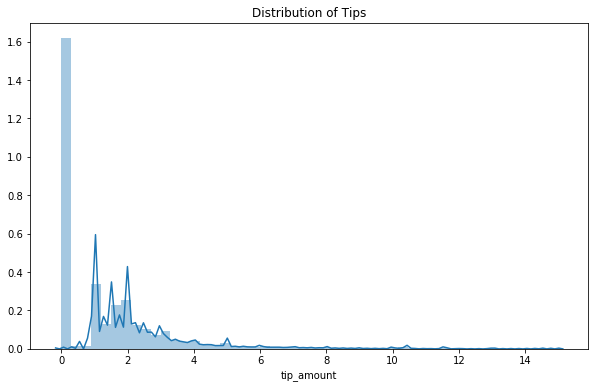

In [46]:
plt.figure(figsize = (10, 6))
sns.distplot(df[df['tip_amount']<15]['tip_amount'])
plt.title('Distribution of Tips')
plt.show()

In [47]:
((df[df['tip_amount']==0].shape[0])/len(df))*100

48.1901299613768

48.31% of passengers do not give any tips at all. We analyse this further in the notebook Part 2- Classifier.

### passenger_count

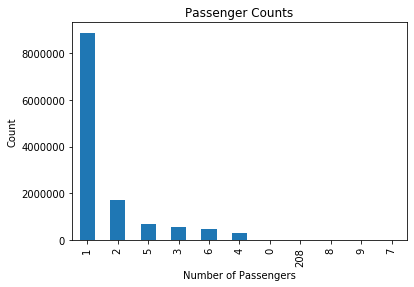

In [48]:
df['passenger_count'].value_counts().plot.bar();
plt.title('Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.show()

In [49]:
len(df[(df['passenger_count'] == 7)|(df['passenger_count'] ==8)|(df['passenger_count'] == 9)|(df['passenger_count'] ==208)])

10

we remove the passenger counts greater than 6.

In [50]:
df = df[df['passenger_count'] <= 6 ]

In [51]:
df.shape

(12581805, 19)

Let's have a close look to the passenger_count with zero as their values.

In [52]:
len(df[(df['passenger_count'] == 0)])

208

There are 208 records for taxi without any passenger. We check for ones who the number of passengers are zero and the tip amounts are none zero. We drop them from the dataset.


In [53]:
len(df[(df['passenger_count'] == 0)&(df['tip_amount'] != 0)])

28

In [54]:
x=df[(df['passenger_count'] == 0)&(df['tip_amount'] != 0)]

In [55]:
x.index

Int64Index([  912240,  1015839,  1067478,  1519398,  1709500,  2347360,
             2394824,  2732937,  3188502,  4107597,  4603864,  4938655,
             5097789,  5685493,  5804350,  6422061,  6469959,  6594901,
             6947536,  8143063,  8399818,  8472022,  8472514,  9387162,
            10763964, 10846834, 11809449, 12475848],
           dtype='int64')

In [56]:
df= df.drop(x.index)

In [57]:
df.shape

(12581777, 19)

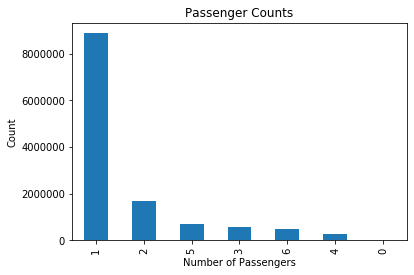

In [58]:
df['passenger_count'].value_counts().plot.bar();
plt.title('Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.show()

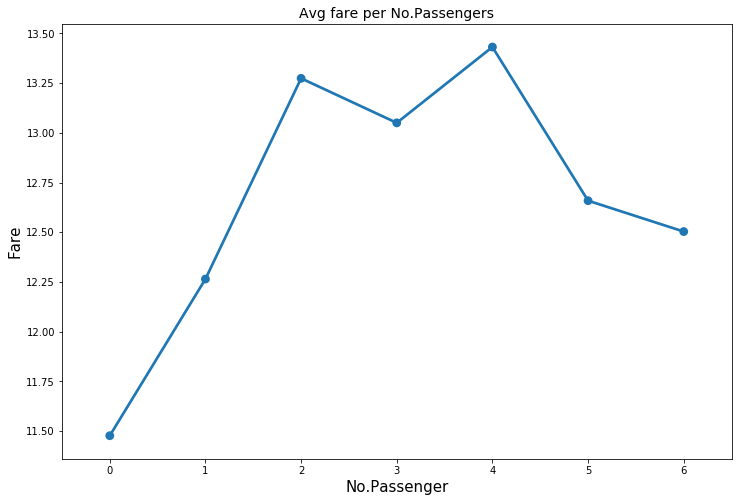

In [59]:
df_agg = df.groupby(df.passenger_count)['fare_amount'].aggregate(np.mean).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(df_agg.passenger_count, df_agg.fare_amount.values)

plt.xlabel('No.Passenger', fontsize=15)
plt.ylabel('Fare', fontsize=15)
plt.title('Avg fare per No.Passengers', loc='Center', fontsize=14)
plt.show()

In total, there is not any significant difference in average amount of fare for taxi with different number of passengers.Taxi with 2 and 4 passengers, they get paid slightly more.

### Latitude and longitude

In [60]:
df['pickup_longitude'].describe()

count    1.258178e+07
mean    -7.314961e+01
std      7.807424e+00
min     -1.958327e+03
25%     -7.399273e+01
50%     -7.398236e+01
75%     -7.396844e+01
max      5.142525e+01
Name: pickup_longitude, dtype: float64

Latitudes range are from -90 to 90, and longitudes range are from -180 to 80. I will drop data out of this range. 

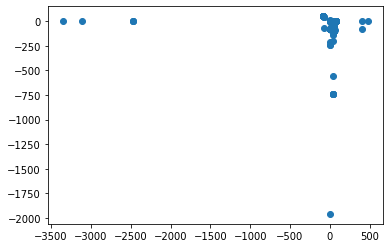

In [61]:
plt.scatter(df.pickup_latitude,df.pickup_longitude)

In [62]:
df[(df['pickup_latitude']<-90)|(df['pickup_latitude']>90)]

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount
1172945,4EF7FFB140F99C849410B914939B4949,6826C6F899BC8E147099C30C1BAA9B8F,VTS,1,2013-08-13 07:09:00,2013-08-13 07:22:00,6,780,3.51,-0.088333,-2475.69580,-0.193333,40.720001,CRD,13.0,0.0,0.5,3.0,0.0
1385969,28AA47C51A2536F1ED6E281294349654,7000A6F7D3DF068F2F708DCACDA6BD2A,VTS,1,2013-08-13 22:07:00,2013-08-13 22:12:00,1,300,1.07,-0.043333,473.95828,-73.954330,40.727814,CRD,5.5,0.5,0.5,2.0,0.0
1787882,566284B58F01B2795826A1EB2D3F0878,923F7DB16E1F81101C4C45A5918A2A2F,VTS,1,2013-08-15 12:30:00,2013-08-15 12:53:00,1,1380,2.68,0.000000,-2475.69530,-73.968307,40.760414,CSH,16.0,0.0,0.5,0.0,0.0
1815889,C751E707D7D20AA0761EE82793EFC6BD,F827C2C9619C54162001D91946B1C91B,VTS,1,2013-08-15 19:29:00,2013-08-15 19:40:00,1,660,1.45,-0.001667,-3113.28980,-74.004929,40.728977,CRD,8.5,1.0,0.5,1.0,0.0
1913324,399DB6E048D813564DA0358503474A2C,3DD545273B93D2553223F296AE0326B3,VTS,1,2013-08-16 08:23:00,2013-08-16 08:38:00,1,900,3.82,-0.383333,-3347.93730,-73.986534,40.740021,CSH,14.5,0.0,0.5,0.0,0.0
3154685,826D3D21FC26AD85268255B8DDED2257,79FD4F28FFFD64BC6033394C09B3D034,VTS,1,2013-08-21 16:47:00,2013-08-21 17:03:00,1,960,1.43,0.000000,-2475.68800,-74.005257,40.756271,CRD,11.0,1.0,0.5,2.0,0.0
4574044,4BA70A64D45168B679BD9E8C77D322F6,3A97AB628BAAC63C2F1E0EF0BD3ECEDD,VTS,1,2013-08-26 08:27:00,2013-08-26 08:40:00,6,780,2.22,-73.996689,405.26666,-73.962791,40.672295,CRD,10.5,0.0,0.5,3.3,0.0
12299444,826D3D21FC26AD85268255B8DDED2257,79FD4F28FFFD64BC6033394C09B3D034,VTS,1,2013-08-10 18:15:00,2013-08-10 18:19:00,1,240,0.89,0.000000,404.96365,-73.953255,40.771774,CSH,5.0,0.0,0.5,0.0,0.0


In [63]:
#We need to drop these outliers
df = df.drop((df[(df['pickup_latitude']<-90)|(df['pickup_latitude']>90)]).index, axis=0)

In [64]:
df = df.drop((df[(df['pickup_longitude']<-180)|(df['pickup_longitude']>180)]).index, axis=0)

In [65]:
df.shape

(12581758, 19)

Similar operation for dropoff latitude and longitude

In [66]:
df = df.drop((df[(df['dropoff_latitude']<-90)|(df['dropoff_latitude']>90)]).index, axis=0)
df = df.drop((df[(df['dropoff_longitude']<-180)|(df['dropoff_longitude']>180)]).index, axis=0)

In [67]:
df.shape

(12581739, 19)

Text(0, 0.5, 'pickup_longitude')

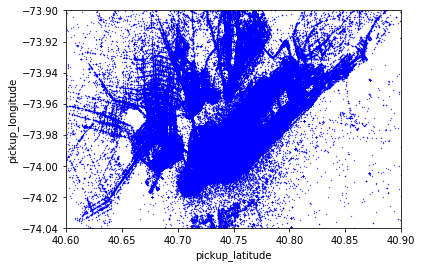

In [68]:
plt.scatter(df.pickup_latitude,df.pickup_longitude,s=0.1,c='b' )
plt.xlim([40.6, 40.9])
plt.ylim([-74.04,-73.9])
plt.xlabel('pickup_latitude')
plt.ylabel('pickup_longitude')

We can see a huge number of pickups in Manhattan, falling off as we move away from the city centre. 

In [69]:
def generateBaseMap(default_location=[40.71, -74], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [70]:
# Make an empty map
NYC_location = [40.71, -74]
m = generateBaseMap(default_location=NYC_location)


In [71]:
location=[]
for i in range(0, len(df.head(1000))):
    location.append([df.iloc[i]['pickup_latitude'], df.iloc[i]['pickup_longitude']])

In [72]:
HeatMap(location).add_to(m)
m

Check the period of time in which the taxis pickup and drop off passengers.



In [73]:
print('Time of pick off ranges from ' + str(df['pickup_datetime'].min()) + ' to ' + str(df['pickup_datetime'].max()))


Time of pick off ranges from 2013-08-01 00:00:00 to 2013-08-31 23:59:59


In [74]:
print('Time of drop off ranges from ' + str(df['dropoff_datetime'].min()) + ' to ' + str(df['dropoff_datetime'].max()))


Time of drop off ranges from 2013-08-01 00:00:00 to 2013-09-04 14:34:04


The maximum time for drop off seems to be out of range

In [75]:
df[df['dropoff_datetime']=='2013-09-04 14:34:04']

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount
10340283,6E3369BED599B9EAF4C80E504BA487D7,10535DC97AE88F1496C630BCACEA88C3,CMT,2,2013-08-24 13:25:34,2013-09-04 14:34:04,2,650,25.4,-73.978699,40.762051,-73.782738,40.667202,CSH,52.0,0.0,0.5,0.0,0.0


The taxi picked up two passesngers in 2013-08-24 13:25:34 and dropped off at 2013-09-04 14:34:04. The total duration is 11 dayes which does not seem realistic. So, we drop the row. 

In [76]:
df=df.drop(index=10340283)

In [77]:
df.shape

(12581738, 19)

### Trend of hourly pick up number:


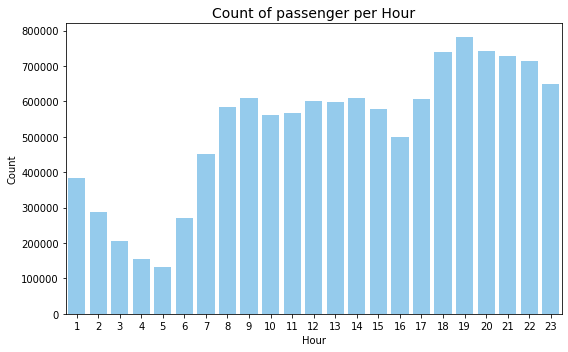

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(df[df.pickup_datetime.dt.hour != 0].groupby(df.pickup_datetime.dt.hour)[['passenger_count']].count().index, 'passenger_count', 
            data=df[df.pickup_datetime.dt.hour != 0].groupby(df.pickup_datetime.dt.hour)[['passenger_count']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of passenger per Hour', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

The most crowded time are 7 am to 10 am in the morning and 6pm to 8 pm in the evening.

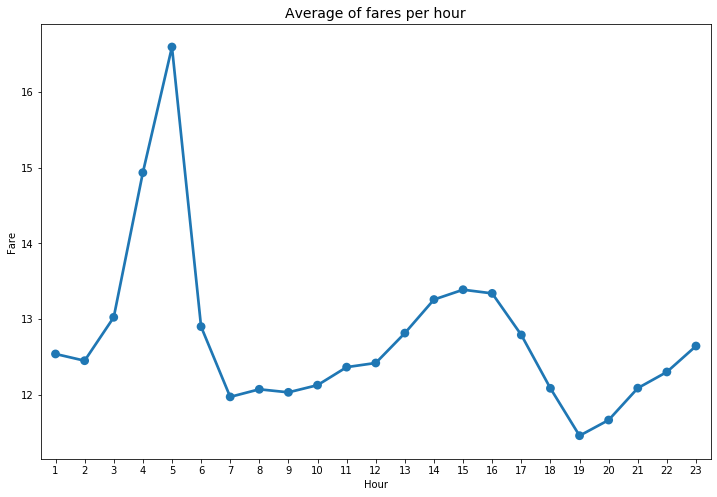

In [79]:
df_agg = df[df.pickup_datetime.dt.hour != 0].groupby(df.pickup_datetime.dt.hour)['fare_amount'].aggregate(np.mean).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_datetime.values, df_agg.fare_amount.values)

plt.xlabel('Hour', fontsize=10)
plt.ylabel('Fare', fontsize=10)
plt.title('Average of fares per hour', loc='Center', fontsize=14)
plt.show()

The fares, seem to be high betweeb 4AM and 6AM, and 2PM to 5PM.

### Trend of weekly pick up number:


Text(0.5, 1.0, 'Count of passenger per Day of Week')

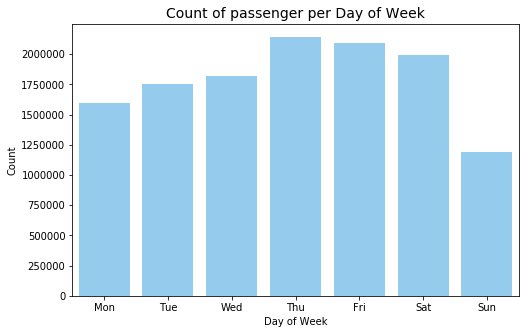

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(df.groupby(df.pickup_datetime.dt.weekday)[['passenger_count']].count().index, 'passenger_count', 
            data=df.groupby(df.pickup_datetime.dt.weekday)[['passenger_count']].count(), color='lightskyblue', linewidth=2)
plt.xticks(df.groupby(df.pickup_datetime.dt.weekday)[['passenger_count']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of passenger per Day of Week', loc='Center', fontsize=14)

High number of passenger on Thursday, Friday and Saturday. On Sundays taxi driver should expect the least number of passengers

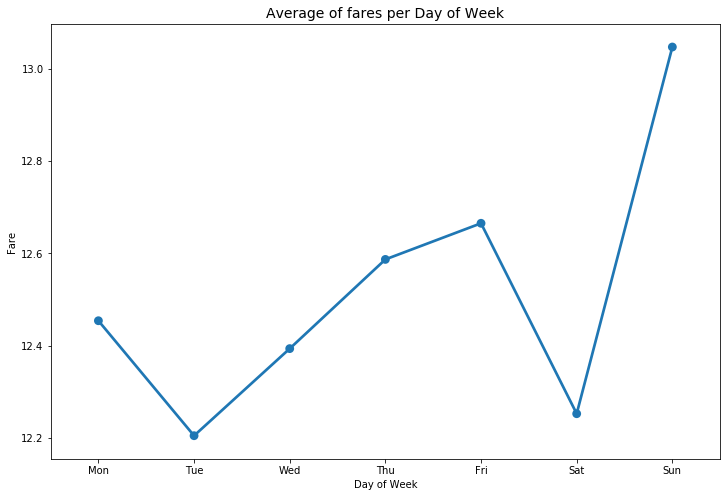

In [81]:
df_agg = df.groupby(df.pickup_datetime.dt.weekday)['fare_amount'].aggregate(np.mean).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_datetime.values, df_agg.fare_amount.values)

plt.xticks(df.groupby(df.pickup_datetime.dt.weekday)[['fare_amount']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Fare', fontsize=10)
plt.title('Average of fares per Day of Week', loc='Center', fontsize=14)
plt.show()

The highest fares seem to be on a Sunday and Friday, and the lowest on Tuesday and Saturday. Maybe people travel far distances on Sundays e.g. visiting family. And on Saturdays maybe people are mostly stay indoors and or have short travelling distance inside city.

### Distribution of the number of passengers across the vendor_id variables VTS and CMT 

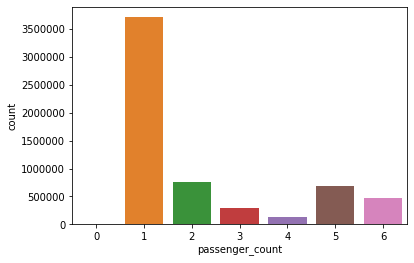

In [82]:
sns.countplot(x="passenger_count", data=df[df["vendor_id"] == 'VTS'])


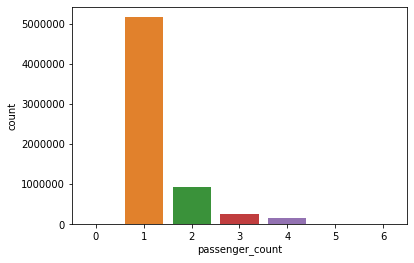

In [83]:
sns.countplot(x="passenger_count", data=df[df["vendor_id"] == 'CMT'])


Both companies have same kind of passengers numbers.

### Distribution of the trip_duration

In [84]:
df["trip_time_in_secs"].describe()

count    1.258174e+07
mean     1.546720e+03
std      5.823629e+04
min      0.000000e+00
25%      3.680000e+02
50%      6.010000e+02
75%      9.600000e+02
max      4.294966e+06
Name: trip_time_in_secs, dtype: float64

The trip_duration would be a lot more intuitive when the datetime representation is used,rather than representing with seconds. 

In [85]:
(df["dropoff_datetime"] - df["pickup_datetime"]).describe()


count                  12581738
mean     0 days 00:12:37.094484
std      0 days 00:10:30.439767
min           -1 days +09:00:19
25%             0 days 00:06:08
50%             0 days 00:10:02
75%             0 days 00:16:00
max             7 days 00:19:54
dtype: object

It is interesting to see that there happens to be a trip that lasted for over 7 days. Let us plot the trip duration in seconds to view any other possbile outliers.



In [86]:
duration_trip = df["dropoff_datetime"] - df["pickup_datetime"]

In [87]:
df[duration_trip=='7 days 00:19:54']

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount
11576548,6DE2841B928699953474F71C6D371D4A,B339EAAD727FA00A918F909BBD04EC91,CMT,1,2013-08-19 12:21:05,2013-08-26 12:40:59,1,650,2.3,-73.959137,40.712154,-73.990517,40.728706,CSH,12.0,0.0,0.5,0.0,0.0


We drop this row

In [88]:
df = df.drop(index=11576548)

We continue dropping the rows which the duration trip last more than a day

In [89]:
duration_trip = df["dropoff_datetime"] - df["pickup_datetime"]

In [90]:
duration_trip.max()

Timedelta('3 days 14:31:59')

In [91]:
df=df.drop(df[duration_trip=='3 days 14:31:59'].index,axis=0)

In [92]:
duration_trip = df["dropoff_datetime"] - df["pickup_datetime"]

In [93]:
duration_trip.max()

Timedelta('2 days 07:47:15')

In [94]:
df=df.drop(df[duration_trip=='2 days 07:47:15'].index,axis=0)

In [95]:
(df["dropoff_datetime"] - df["pickup_datetime"]).max()

Timedelta('2 days 06:56:50')

In [96]:
df=df.drop(df[duration_trip=='2 days 06:56:50'].index,axis=0)

C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [97]:
(df["dropoff_datetime"] - df["pickup_datetime"]).max()

Timedelta('1 days 19:22:38')

In [98]:
df=df.drop(df[duration_trip=='1 days 19:22:38'].index,axis=0)

C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [99]:
(df["dropoff_datetime"] - df["pickup_datetime"]).max()

Timedelta('1 days 16:08:07')

In [100]:
df=df.drop(df[duration_trip=='1 days 16:08:07'].index,axis=0)

C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [101]:
(df["dropoff_datetime"] - df["pickup_datetime"]).max()

Timedelta('1 days 08:18:58')

In [102]:
df=df.drop(df[duration_trip=='1 days 08:18:58'].index, axis=0)

C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [103]:
(df["dropoff_datetime"] - df["pickup_datetime"]).max()

Timedelta('1 days 04:27:53')

In [104]:
df=df.drop(df[duration_trip=='1 days 04:27:53'].index, axis=0)

C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [105]:
(df["dropoff_datetime"] - df["pickup_datetime"]).max()

Timedelta('1 days 03:39:09')

In [106]:
df=df.drop(df[duration_trip=='1 days 03:39:09'].index, axis=0)

C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [107]:
(df["dropoff_datetime"] - df["pickup_datetime"]).max()

Timedelta('1 days 03:20:29')

In [108]:
df = df.drop(df[duration_trip=='1 days 03:20:29'].index,axis=0) 

C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [109]:
(df["dropoff_datetime"] - df["pickup_datetime"]).max()

Timedelta('1 days 00:33:14')

In [110]:
df = df.drop(df[duration_trip=='1 days 00:33:14'].index,axis=0) 

C:\Users\Nastaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [111]:
(df["dropoff_datetime"] - df["pickup_datetime"]).max()

Timedelta('0 days 23:59:08')

Lets have a look to the trip_duration in seconds and compare the it with the duration time we study previously

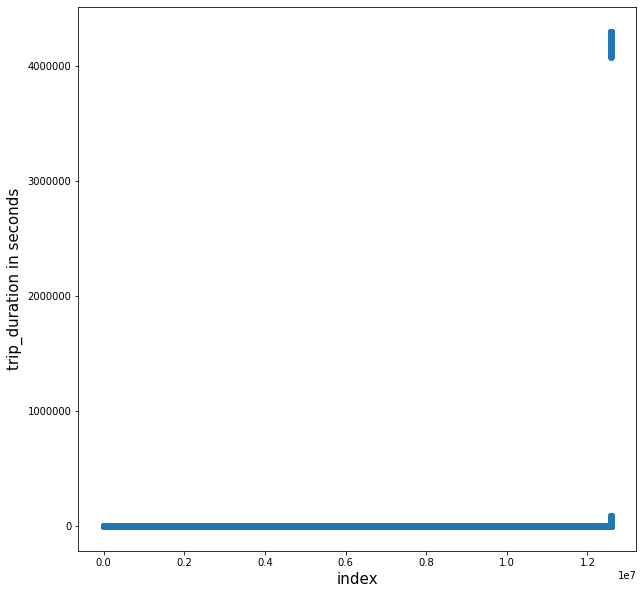

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(df["trip_time_in_secs"])), np.sort(df["trip_time_in_secs"]))
plt.xlabel('index', fontsize=15)
plt.ylabel('trip_duration in seconds',fontsize=15)
plt.show()



In [113]:
df['trip_time_in_secs'].describe()

count    1.258173e+07
mean     1.546381e+03
std      5.822380e+04
min      0.000000e+00
25%      3.680000e+02
50%      6.010000e+02
75%      9.600000e+02
max      4.294966e+06
Name: trip_time_in_secs, dtype: float64

In [114]:
(df['trip_time_in_secs'].max())/3600

1193.046111111111

We see that there are outliers with trip durations of 1193!

lets have a look to the drop off and the pick off data for that trip time

In [115]:
df[df['trip_time_in_secs']==4.294966e+06][['pickup_datetime','dropoff_datetime']]

,pickup_datetime,dropoff_datetime
9606820,2013-08-25 00:33:04,2013-08-25 00:36:37


The ride only last 3 minutes. But, the trip_time recorded as 4.294966e+06 seconds!


Lets have look to some random data and compare the trip duration with pick up and drop off time

In [116]:
df.sample(5)[['trip_time_in_secs','pickup_datetime','dropoff_datetime']]

,trip_time_in_secs,pickup_datetime,dropoff_datetime
4199090,360,2013-08-28 01:27:00,2013-08-28 01:33:00
2338487,840,2013-08-18 01:55:00,2013-08-18 02:09:00
11995541,480,2013-08-09 14:04:00,2013-08-09 14:12:00
5307111,1800,2013-08-26 12:19:00,2013-08-26 12:49:00
1149497,540,2013-08-12 22:46:00,2013-08-12 22:55:00


from random sample above, trip_time_in_secs is the subtraction of dropoff_datetime and pickup_datetime.

Here, we find the outier related to trip_time_in_secs column and drop them from data frame.

In [117]:
(df["dropoff_datetime"] - df["pickup_datetime"]).max()

Timedelta('0 days 23:59:08')

The maximun time of the trip based on subtracion above is 24 hour which is 86400 second. So, we drop all the data with trip_time_in_secs bigger than 86400 s. 

In [118]:
#Removing the outliers in the dataset
df = df[df['trip_time_in_secs'] < 86400]

In [119]:
df.shape

(12579404, 19)

In [120]:
df['trip_time_in_secs'].describe()

count    1.257940e+07
mean     7.552081e+02
std      5.690078e+02
min      0.000000e+00
25%      3.680000e+02
50%      6.010000e+02
75%      9.600000e+02
max      8.634000e+04
Name: trip_time_in_secs, dtype: float64

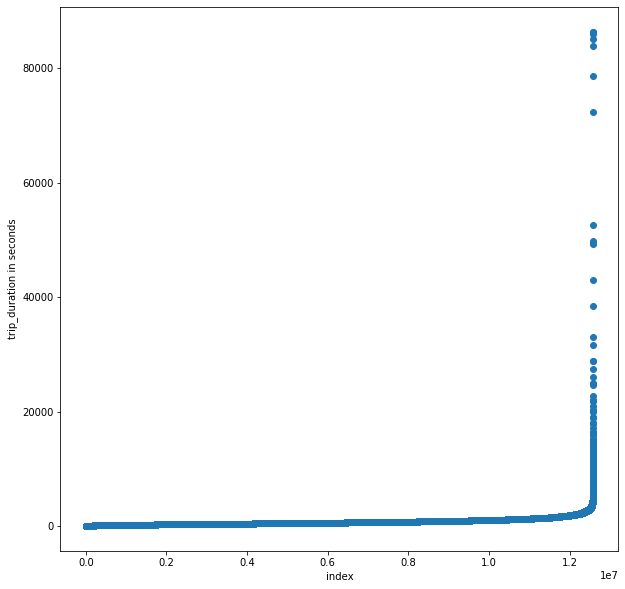

In [121]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(df['trip_time_in_secs'])), np.sort(df['trip_time_in_secs']))
plt.xlabel('index')
plt.ylabel('trip_duration in seconds')
plt.show()

### Exploring the behaviour of trip_duration based on the number of trips

In order to visualize the trip duration, it is important to aggregate the trip duration at each of the pickup_datetime. Since there could be outliers in the trip duration variable median would be a more representative measure, rather than the mean.

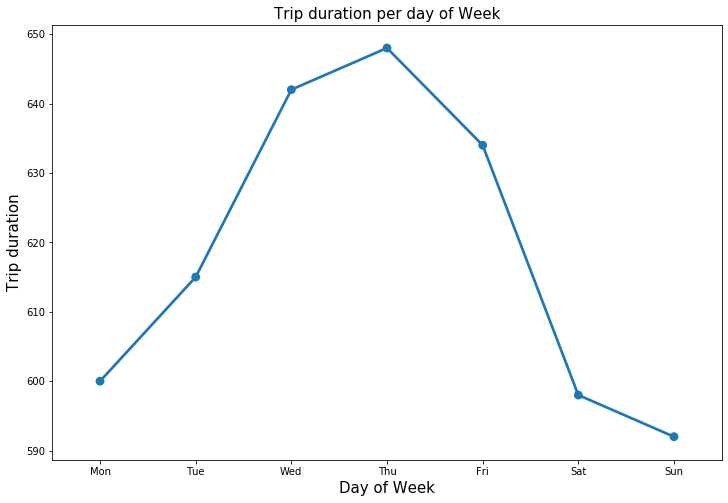

In [122]:
df_agg = df.groupby(df.pickup_datetime.dt.weekday)['trip_time_in_secs'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_datetime.values, df_agg.trip_time_in_secs.values)

plt.xticks(df.groupby(df.pickup_datetime.dt.weekday)[['trip_time_in_secs']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Trip duration', fontsize=15)
plt.title('Trip duration per day of Week', loc='Center', fontsize=15)
plt.show()

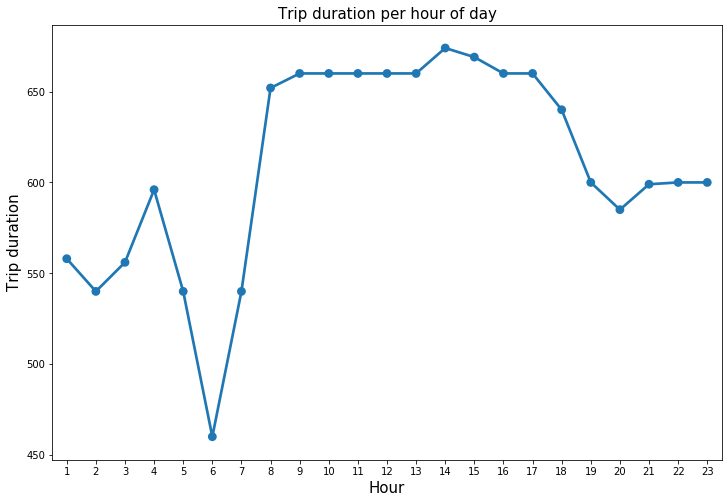

In [123]:
df_agg = df[df.pickup_datetime.dt.hour != 0].groupby(df.pickup_datetime.dt.hour)['trip_time_in_secs'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_datetime.values, df_agg.trip_time_in_secs.values)

plt.xlabel('Hour', fontsize=15)
plt.ylabel('Trip duration', fontsize=15)
plt.title('Trip duration per hour of day', loc='Center', fontsize=15)
plt.show()

* Observation at days of week: 
  Trip durations are mostly on Thursday's, Wednesday's and Friday's & the least on Sunday's.

* Observation at hours of day:
  Trip durations are mostly between 13:00  and 16:00 in the afternoon & the least between 04:00  and 07:00 in the morning.

In [124]:
# saving the dataframe 
df.to_csv('data.csv')